      Produk  Penjualan     Diskon       Harga
0   Produk 1         97  10.453126  156.140312
1   Produk 2        167  14.553302  448.034903
2   Produk 3        117  21.243375  289.443218
3   Produk 4        153  14.599543  420.364301
4   Produk 5         59  12.855696  308.190992
5   Produk 6         71  21.721575  371.551812
6   Produk 7         86  11.747923  388.253062
7   Produk 8        137  17.963437  332.807917
8   Produk 9        120  12.364831  314.949292
9  Produk 10        138  24.143103  403.446250


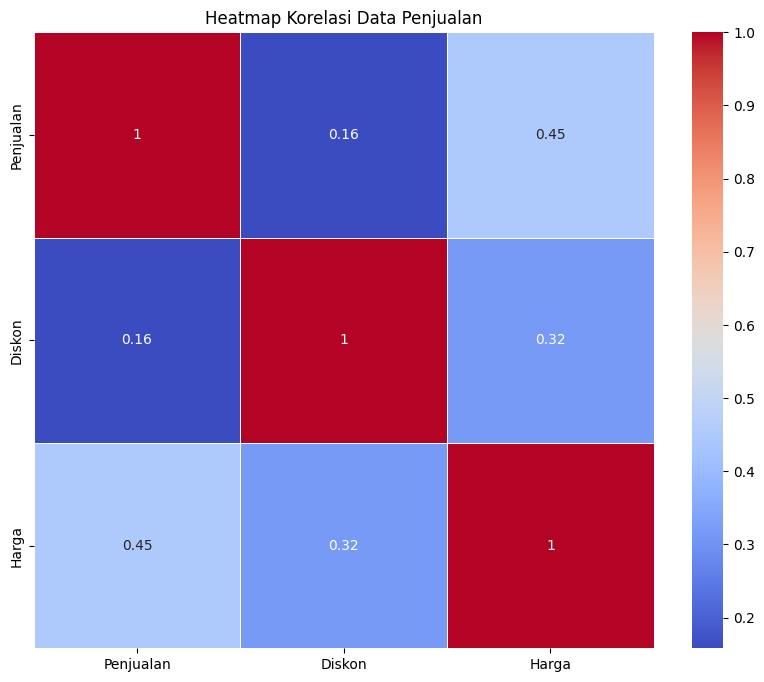

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat dummy data
np.random.seed(0)
data = pd.DataFrame({
    'Produk': [f'Produk {i}' for i in range(1, 11)],
    'Penjualan': np.random.randint(50, 200, 10),
    'Diskon': np.random.uniform(5, 25, 10),
    'Harga': np.random.uniform(100, 500, 10)
})

# Menampilkan data
print(data)

# Menghitung korelasi antar variabel
correlation_matrix = data[['Penjualan', 'Diskon', 'Harga']].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Data Penjualan')
plt.show()


In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Data transaksi
transactions = [
    ['milk', 'bread', 'beer'],
    ['milk', 'bread'],
    ['milk', 'beer'],
    ['bread', 'beer'],
    ['milk', 'bread', 'beer', 'diaper']
]

# Mengubah data transaksi menjadi format yang sesuai
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Menemukan frequent itemsets dengan min_support=0.6
frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets)

# Menemukan aturan asosiasi dengan min_threshold=0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("Association Rules:\n", rules)


Frequent Itemsets:
    support       itemsets
0      0.8         (milk)
1      0.8        (bread)
2      0.8         (beer)
3      0.6  (bread, milk)
4      0.6  (beer, bread)
5      0.6   (beer, milk)
Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0     (bread)      (milk)                 0.8                 0.8      0.6   
1      (milk)     (bread)                 0.8                 0.8      0.6   
2      (beer)     (bread)                 0.8                 0.8      0.6   
3     (bread)      (beer)                 0.8                 0.8      0.6   
4      (beer)      (milk)                 0.8                 0.8      0.6   
5      (milk)      (beer)                 0.8                 0.8      0.6   

   confidence    lift  leverage  conviction  zhangs_metric  
0        0.75  0.9375     -0.04         0.8          -0.25  
1        0.75  0.9375     -0.04         0.8          -0.25  
2        0.75  0.9375     -0.04         0.8     